In [2]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['StA LD-DD 0118-0201-2024-Copy1.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)

df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,2,2,15,9,12,10,17,...,6,6,4,0,0,0,0,0,0,0
2,1,2024-01-18 13:18:00,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,2024-01-18 13:19:00,1,0,0,0,0,1,0,2,...,3,0,20,0,0,0,0,0,0,0
4,1,2024-01-18 13:20:00,1,0,0,0,4,3,0,1,...,0,0,9,0,0,0,0,0,0,0
5,1,2024-01-18 13:21:00,1,0,0,0,3,3,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_428/1050566784.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')


DataFrame 2 - Steatoda A masking 02 pm.txt:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,


/tmp/ipykernel_428/1050566784.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')


DataFrame 3 - Steatoda A masking 10 am.txt:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,


/tmp/ipykernel_428/1050566784.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')


DataFrame 4 - Steatoda A masking midnight.txt:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,


/tmp/ipykernel_428/1050566784.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')


DataFrame 5 - Steatoda A masking 4 am.txt:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,



df2:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,



df3:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,



df4:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,



df5:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,



Average Activities for Days 6, 7, 8 after Light Pulse:
df2: nan
df3: nan
df4: nan
df5: nan
ValueError: zero-size array to reduction operation maximum which has no identity
ValueError: zero-size array to reduction operation maximum which has no identity
ValueError: zero-size array to reduction operation maximum which has no identity
ValueError: zero-size array to reduction operation maximum which has no identity


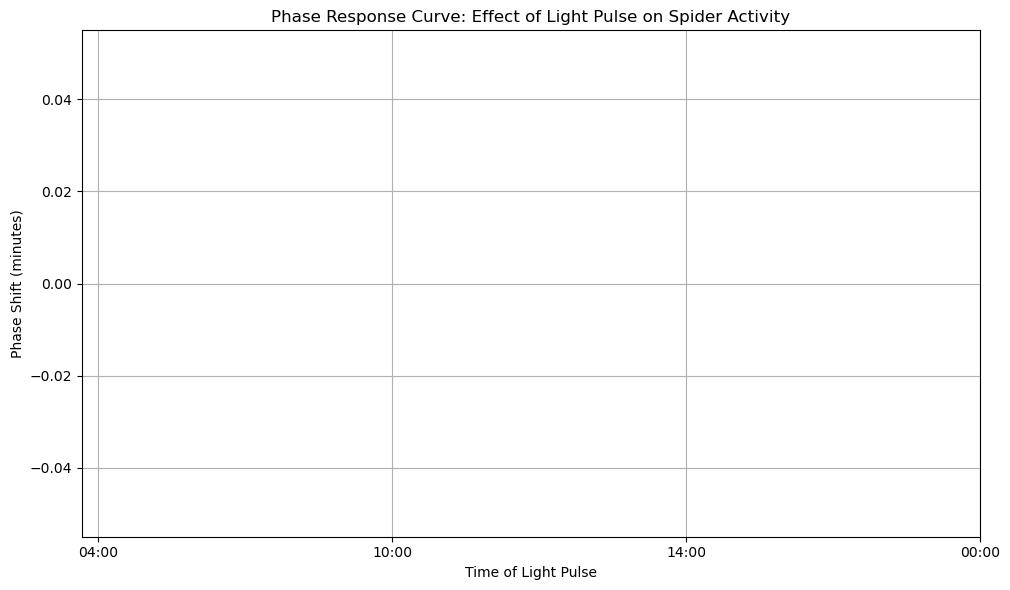

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Function to process each data file and add 'Activity' column
def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    try:
        df = pd.read_csv(file, names=col_names, sep='\s+', header=None, na_values=['na', '--'])
        df = df.set_index('Index')
        df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
        df = df[df["MonStatus"] == 1]

        # Map month abbreviations to numeric values and create 'Date' column
        month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
        df['DateM'] = df['DateM'].str[:3].map(month_map)
        df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
        df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

        # Extract date and time components
        df['Date'] = df['Date'].dt.date
        df['Time'] = df['Time'].dt.time

        # Drop unnecessary columns
        df = df.drop(["DateD", "DateM", "DateY", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

        # Map unique dates to day numbers
        day_map = {day: idx+1 for idx, day in enumerate(df['Date'].unique())}
        df.insert(0, 'Day', df['Date'].map(day_map))

        # Calculate Activity (counts per minute) for all sensors
        numeric_cols = df.columns[6:37]  # Assuming columns from 'Sp1' to 'Sp32'
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coerce errors
        df['Activity'] = df[numeric_cols].sum(axis=1, skipna=True) / 60.0

        # Combine date and time into a datetime column for indexing and analysis
        df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
        df = df.dropna(subset=['Datetime'])  # Drop rows with invalid datetime

        df.set_index('Datetime', inplace=True)  # Set Datetime as the index

        return df

    except Exception as e:
        print(f"Error processing {file}: {str(e)}")
        return None

# Function to process all files into DataFrames
def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=2):  # Start from 2 to match 'df2', 'df3', etc.
        try:
            df = process_file(file)
            if df is not None:
                dataframes[f'df{idx}'] = df
                print(f"DataFrame {idx} - {file}:")
                display(df.head())  # Displaying the first few rows for each DataFrame
                print()
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
    return dataframes

# List of files to process
files = ['Steatoda A masking 02 pm.txt',
         'Steatoda A masking 10 am.txt',
         'Steatoda A masking midnight.txt',
         'Steatoda A masking 4 am.txt']

# Process all files into DataFrames
dataframes = process_files(files)

# Display all dataframes with 'Activity' column added
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)
    print()

# Step 1: Calculate average activity during days 6, 7, and 8 after light pulse for each file
try:
    # Dictionary to store average activities for each post-pulse file
    avg_activities = {}

    for name, df in dataframes.items():
        avg_activity = df[df['Day'].isin([6, 7, 8])]['Activity'].mean()
        avg_activities[name] = avg_activity

    print("Average Activities for Days 6, 7, 8 after Light Pulse:")
    for name, avg_activity in avg_activities.items():
        print(f"{name}: {avg_activity}")

except KeyError as e:
    print(f"Error: DataFrame '{e}' not found in dataframes. Please check the processing logic.")
    exit()

# Step 2: Calculate phase shifts for each post-light pulse activity file
post_pulse_files = ['Steatoda A masking 02 pm.txt',
                    'Steatoda A masking 10 am.txt',
                    'Steatoda A masking midnight.txt',
                    'Steatoda A masking 4 am.txt']

post_pulse_dataframes = {}

for file in post_pulse_files:
    try:
        post_pulse_dataframes[file] = dataframes[f'df{files.index(file) + 2}']  # Adjust index based on how dataframes are stored

    except KeyError as e:
        print(f"Error: DataFrame for '{file}' not found in dataframes. Please check the processing logic.")
        continue

# Function to calculate phase shift based on cross-correlation
def calculate_phase_shift(normal_activity_data, post_pulse_data):
    try:
        # Clean data: Handle NaNs or zeros in 'Activity' column
        normal_activity_data.dropna(subset=['Activity'], inplace=True)
        post_pulse_data.dropna(subset=['Activity'], inplace=True)
        
        # Ensure equal lengths by resampling or interpolating
        normal_activity_data = normal_activity_data.resample('5T').mean().interpolate(method='linear')
        post_pulse_data = post_pulse_data.resample('5T').mean().interpolate(method='linear')
        
        if len(normal_activity_data) != len(post_pulse_data):
            raise ValueError("Lengths of normal and post-pulse activity data must be equal.")
        
        # Use only specified sensors for phase shift calculation
        activity_cols = ['Sp4', 'Sp7', 'Sp11', 'Sp13', 'Sp15', 'Sp17', 'Sp18', 'Sp19', 'Sp21', 'Sp22', 'Sp25']
        normal_activity = normal_activity_data[activity_cols].to_numpy().flatten()
        post_pulse_activity = post_pulse_data[activity_cols].to_numpy().flatten()
        
        # Compute cross-correlation
        cross_corr = correlate(normal_activity, post_pulse_activity, mode='same')
        
        # Find index of the maximum correlation (peak of cross-correlation)
        max_corr_index = np.argmax(cross_corr)
        
        # Corresponding lag time (in minutes)
        lag_time = max_corr_index * (normal_activity_data.index[1] - normal_activity_data.index[0]).seconds / 60.0
        
        return lag_time

    except KeyError as e:
        print(f"Error: {e} column not found in one of the files.")
        return np.nan
    except ValueError as ve:
        print(f"ValueError: {ve}")
        return np.nan
    except Exception as e:
        print(f"Error in calculate_phase_shift: {str(e)}")
        return np.nan

# Calculate phase shifts for each post-pulse file
phase_shifts = {}

for file, df in post_pulse_dataframes.items():
    phase_shift = calculate_phase_shift(dataframes['df2'], df)  # Using 'df2' as the normal activity data
    phase_shifts[file] = phase_shift

# Step 4: Plot Phase Response Curve
# Create lists for x (times of light pulses) and y (phase shifts)
light_pulse_times = ['04:00', '10:00', '14:00', '00:00']  # Specify the desired order
shift_values = [phase_shifts.get(file, np.nan) for file in post_pulse_files]

# Plotting the Phase Response Curve
plt.figure(figsize=(10, 6))
plt.plot(light_pulse_times, shift_values, marker='o', linestyle='-', color='b')
plt.title('Phase Response Curve: Effect of Light Pulse on Spider Activity')
plt.xlabel('Time of Light Pulse')
plt.ylabel('Phase Shift (minutes)')
plt.grid(True)
plt.tight_layout()
plt.xticks(light_pulse_times)  # Set x-axis ticks to specified time points
plt.show()


Processed data from Steatoda A masking 02 pm.txt:
                     Day      Time  Light  Sp1  Sp2  Sp3  Sp4  Sp5  Sp6  Sp7  \
Datetime                                                                       
2024-03-20 11:04:00    1  11:04:00      1    0    0    2    2   15    0    8   
2024-03-20 11:05:00    1  11:05:00      1    0    0    5    1    1    0    0   
2024-03-20 11:06:00    1  11:06:00      1    0    0    3    1    3    0    0   
2024-03-20 11:07:00    1  11:07:00      1    0    0    0    1    3    0    0   
2024-03-20 11:08:00    1  11:08:00      1    0    0    0    1    4    0    0   

                     ...  Sp25  Sp26  Sp27  Sp28  Sp29  Sp30  Sp31  Sp32  \
Datetime             ...                                                   
2024-03-20 11:04:00  ...     2     0     0     0     0     0     0     0   
2024-03-20 11:05:00  ...     0     0     0     0     0     0     0     0   
2024-03-20 11:06:00  ...     0     0     0     0     0     0     0     0   
2024-03-2

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-20 11:04:00,1,11:04:00,1,0,0,2,2,15,0,8,...,2,0,0,0,0,0,0,0,2024-03-20,0.766667
2024-03-20 11:05:00,1,11:05:00,1,0,0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,2024-03-20,0.716667
2024-03-20 11:06:00,1,11:06:00,1,0,0,3,1,3,0,0,...,0,0,0,0,0,0,0,0,2024-03-20,0.550000
2024-03-20 11:07:00,1,11:07:00,1,0,0,0,1,3,0,0,...,1,0,0,0,0,0,0,0,2024-03-20,0.583333
2024-03-20 11:08:00,1,11:08:00,1,0,0,0,1,4,0,0,...,2,0,0,0,0,0,0,0,2024-03-20,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27 10:23:00,8,10:23:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.000000
2024-03-27 10:24:00,8,10:24:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.000000
2024-03-27 10:25:00,8,10:25:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.233333



df3:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-07 10:34:00,1,10:34:00,1,0,0,1,0,0,0,21,...,0,0,0,0,0,0,0,0,2024-03-07,0.466667
2024-03-07 10:35:00,1,10:35:00,1,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,2024-03-07,0.300000
2024-03-07 10:36:00,1,10:36:00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2024-03-07,0.216667
2024-03-07 10:37:00,1,10:37:00,1,0,0,0,0,0,7,7,...,0,0,0,0,0,0,0,0,2024-03-07,0.483333
2024-03-07 10:38:00,1,10:38:00,1,0,0,0,0,2,12,6,...,0,0,0,0,0,0,0,0,2024-03-07,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13 18:54:00,7,18:54:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.083333
2024-03-13 18:55:00,7,18:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.000000
2024-03-13 18:56:00,7,18:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.000000



df4:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-04-17 15:56:00,1,15:56:00,1,0,0,0,16,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.766667
2024-04-17 15:57:00,1,15:57:00,1,0,0,0,8,0,0,3,...,0,0,0,0,0,0,0,0,2024-04-17,0.483333
2024-04-17 15:58:00,1,15:58:00,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,2024-04-17,0.633333
2024-04-17 15:59:00,1,15:59:00,1,0,0,0,15,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.533333
2024-04-17 16:00:00,1,16:00:00,1,0,0,0,9,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24 14:58:00,8,14:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000
2024-04-24 14:59:00,8,14:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000
2024-04-24 15:00:00,8,15:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000



df5:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-05-01 07:39:00,1,07:39:00,1,0,0,3,2,4,0,1,...,0,0,0,0,0,0,0,0,2024-05-01,0.516667
2024-05-01 07:40:00,1,07:40:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.283333
2024-05-01 07:41:00,1,07:41:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.233333
2024-05-01 07:42:00,1,07:42:00,1,0,0,3,0,7,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.450000
2024-05-01 07:43:00,1,07:43:00,1,0,0,2,0,4,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-08 08:30:00,8,08:30:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000
2024-05-08 08:31:00,8,08:31:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000
2024-05-08 08:32:00,8,08:32:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000



Average Activities for Days 6, 7, 8 after Light Pulse:
df2: 0.027546560243253512
df3: 0.02670931885743828
df4: 0.026755661291743768
df5: 0.031080019636720663
Error in calculate_phase_shift: agg function failed [how->mean,dtype->object]
Error in calculate_phase_shift: agg function failed [how->mean,dtype->object]
Error in calculate_phase_shift: agg function failed [how->mean,dtype->object]
Error in calculate_phase_shift: agg function failed [how->mean,dtype->object]


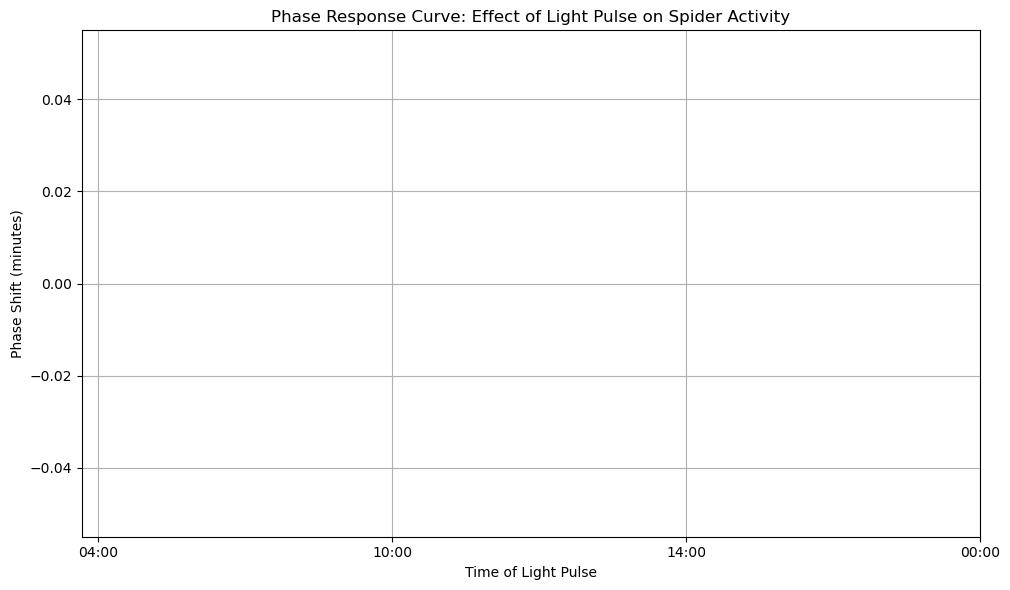

In [13]:
def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    try:
        df = pd.read_csv(file, names=col_names, sep='\s+', header=None, na_values=['na', '--'])
        df = df.set_index('Index')
        
        # Convert Time to proper time format
        df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
        df = df[df["MonStatus"] == 1]

        month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
        df['DateM'] = df['DateM'].str[:3].map(month_map)
        df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
        
        # Create Date column
        df['Date'] = pd.to_datetime(df['DateY'].astype(str) + '-' + 
                                    df['DateM'].astype(str).str.zfill(2) + '-' + 
                                    df['DateD'].astype(str).str.zfill(2), 
                                    format='%Y-%m-%d', errors='coerce')

        df = df.drop(["DateD", "DateM", "DateY", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

        day_map = {day: idx+1 for idx, day in enumerate(df['Date'].dt.date.unique())}
        df.insert(0, 'Day', df['Date'].dt.date.map(day_map))

        numeric_cols = [col for col in df.columns if col.startswith('Sp')]
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
        df['Activity'] = df[numeric_cols].sum(axis=1, skipna=True) / 60.0

        # Create Datetime column
        df['Datetime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str))
        
        df = df.dropna(subset=['Datetime'])  # Drop rows with invalid datetime
        df.set_index('Datetime', inplace=True)

        print(f"Processed data from {file}:")
        print(df.head())
        print(f"Shape: {df.shape}")

        return df

    except Exception as e:
        print(f"Error processing {file}: {str(e)}")
        return None

# Function to process all files into DataFrames
def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=2):
        df = process_file(file)
        if df is not None and not df.empty:
            dataframes[f'df{idx}'] = df
    return dataframes

# List of files to process
files = ['Steatoda A masking 02 pm.txt',
         'Steatoda A masking 10 am.txt',
         'Steatoda A masking midnight.txt',
         'Steatoda A masking 4 am.txt']

# Process all files into DataFrames
dataframes = process_files(files)

# Display all dataframes with 'Activity' column added
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)
    print()

# Step 1: Calculate average activity during days 6, 7, and 8 after light pulse for each file
try:
    # Dictionary to store average activities for each post-pulse file
    avg_activities = {}

    for name, df in dataframes.items():
        avg_activity = df[df['Day'].isin([6, 7, 8])]['Activity'].mean()
        avg_activities[name] = avg_activity

    print("Average Activities for Days 6, 7, 8 after Light Pulse:")
    for name, avg_activity in avg_activities.items():
        print(f"{name}: {avg_activity}")

except KeyError as e:
    print(f"Error: DataFrame '{e}' not found in dataframes. Please check the processing logic.")
    exit()

# Step 2: Calculate phase shifts for each post-light pulse activity file
post_pulse_files = ['Steatoda A masking 02 pm.txt',
                    'Steatoda A masking 10 am.txt',
                    'Steatoda A masking midnight.txt',
                    'Steatoda A masking 4 am.txt']

post_pulse_dataframes = {}

for file in post_pulse_files:
    try:
        post_pulse_dataframes[file] = dataframes[f'df{files.index(file) + 2}']  # Adjust index based on how dataframes are stored

    except KeyError as e:
        print(f"Error: DataFrame for '{file}' not found in dataframes. Please check the processing logic.")
        continue

# Function to calculate phase shift based on cross-correlation
def calculate_phase_shift(normal_activity_data, post_pulse_data):
    try:
        # Clean data: Handle NaNs or zeros in 'Activity' column
        normal_activity_data.dropna(subset=['Activity'], inplace=True)
        post_pulse_data.dropna(subset=['Activity'], inplace=True)
        
        # Ensure equal lengths by resampling or interpolating
        normal_activity_data = normal_activity_data.resample('5T').mean().interpolate(method='linear')
        post_pulse_data = post_pulse_data.resample('5T').mean().interpolate(method='linear')
        
        if len(normal_activity_data) != len(post_pulse_data):
            raise ValueError("Lengths of normal and post-pulse activity data must be equal.")
        
        # Use only specified sensors for phase shift calculation
        activity_cols = ['Sp4', 'Sp7', 'Sp11', 'Sp13', 'Sp15', 'Sp17', 'Sp18', 'Sp19', 'Sp21', 'Sp22', 'Sp25']
        normal_activity = normal_activity_data[activity_cols].to_numpy().flatten()
        post_pulse_activity = post_pulse_data[activity_cols].to_numpy().flatten()
        
        # Compute cross-correlation
        cross_corr = correlate(normal_activity, post_pulse_activity, mode='same')
        
        # Find index of the maximum correlation (peak of cross-correlation)
        max_corr_index = np.argmax(cross_corr)
        
        # Corresponding lag time (in minutes)
        lag_time = max_corr_index * (normal_activity_data.index[1] - normal_activity_data.index[0]).seconds / 60.0
        
        return lag_time

    except KeyError as e:
        print(f"Error: {e} column not found in one of the files.")
        return np.nan
    except ValueError as ve:
        print(f"ValueError: {ve}")
        return np.nan
    except Exception as e:
        print(f"Error in calculate_phase_shift: {str(e)}")
        return np.nan

# Calculate phase shifts for each post-pulse file
phase_shifts = {}

for file, df in post_pulse_dataframes.items():
    phase_shift = calculate_phase_shift(dataframes['df2'], df)  # Using 'df2' as the normal activity data
    phase_shifts[file] = phase_shift

# Step 4: Plot Phase Response Curve
# Create lists for x (times of light pulses) and y (phase shifts)
light_pulse_times = ['04:00', '10:00', '14:00', '00:00']  # Specify the desired order
shift_values = [phase_shifts.get(file, np.nan) for file in post_pulse_files]

# Plotting the Phase Response Curve
plt.figure(figsize=(10, 6))
plt.plot(light_pulse_times, shift_values, marker='o', linestyle='-', color='b')
plt.title('Phase Response Curve: Effect of Light Pulse on Spider Activity')
plt.xlabel('Time of Light Pulse')
plt.ylabel('Phase Shift (minutes)')
plt.grid(True)
plt.tight_layout()
plt.xticks(light_pulse_times)  # Set x-axis ticks to specified time points
plt.show()

Raw data from Steatoda A masking 02 pm.txt:
       DateD DateM  DateY      Time  MonStatus  Extras  MonN  TubeN DataType  \
Index                                                                          
1         20   Mar     24  11:04:00          1       0     1      0       Ct   
2         20   Mar     24  11:05:00          1       0     1      0       Ct   
3         20   Mar     24  11:06:00          1       0     1      0       Ct   
4         20   Mar     24  11:07:00          1       0     1      0       Ct   
5         20   Mar     24  11:08:00          1       0     1      0       Ct   

       Unused  ...  Sp23  Sp24  Sp25  Sp26  Sp27  Sp28  Sp29  Sp30  Sp31  Sp32  
Index          ...                                                              
1           0  ...     0     0     2     0     0     0     0     0     0     0  
2           0  ...     0     0     0     0     0     0     0     0     0     0  
3           0  ...     0     0     0     0     0     0     0     0     

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-20 11:04:00,1,1900-01-01 11:04:00,1,0,0,2,2,15,0,8,...,2,0,0,0,0,0,0,0,2024-03-20,0.766667
2024-03-20 11:05:00,1,1900-01-01 11:05:00,1,0,0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,2024-03-20,0.716667
2024-03-20 11:06:00,1,1900-01-01 11:06:00,1,0,0,3,1,3,0,0,...,0,0,0,0,0,0,0,0,2024-03-20,0.550000
2024-03-20 11:07:00,1,1900-01-01 11:07:00,1,0,0,0,1,3,0,0,...,1,0,0,0,0,0,0,0,2024-03-20,0.583333
2024-03-20 11:08:00,1,1900-01-01 11:08:00,1,0,0,0,1,4,0,0,...,2,0,0,0,0,0,0,0,2024-03-20,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27 10:23:00,8,1900-01-01 10:23:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.000000
2024-03-27 10:24:00,8,1900-01-01 10:24:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.000000
2024-03-27 10:25:00,8,1900-01-01 10:25:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.233333



df3:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-07 10:34:00,1,1900-01-01 10:34:00,1,0,0,1,0,0,0,21,...,0,0,0,0,0,0,0,0,2024-03-07,0.466667
2024-03-07 10:35:00,1,1900-01-01 10:35:00,1,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,2024-03-07,0.300000
2024-03-07 10:36:00,1,1900-01-01 10:36:00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2024-03-07,0.216667
2024-03-07 10:37:00,1,1900-01-01 10:37:00,1,0,0,0,0,0,7,7,...,0,0,0,0,0,0,0,0,2024-03-07,0.483333
2024-03-07 10:38:00,1,1900-01-01 10:38:00,1,0,0,0,0,2,12,6,...,0,0,0,0,0,0,0,0,2024-03-07,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13 18:54:00,7,1900-01-01 18:54:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.083333
2024-03-13 18:55:00,7,1900-01-01 18:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.000000
2024-03-13 18:56:00,7,1900-01-01 18:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.000000



df4:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-04-17 15:56:00,1,1900-01-01 15:56:00,1,0,0,0,16,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.766667
2024-04-17 15:57:00,1,1900-01-01 15:57:00,1,0,0,0,8,0,0,3,...,0,0,0,0,0,0,0,0,2024-04-17,0.483333
2024-04-17 15:58:00,1,1900-01-01 15:58:00,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,2024-04-17,0.633333
2024-04-17 15:59:00,1,1900-01-01 15:59:00,1,0,0,0,15,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.533333
2024-04-17 16:00:00,1,1900-01-01 16:00:00,1,0,0,0,9,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24 14:58:00,8,1900-01-01 14:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000
2024-04-24 14:59:00,8,1900-01-01 14:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000
2024-04-24 15:00:00,8,1900-01-01 15:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000



df5:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-05-01 07:39:00,1,1900-01-01 07:39:00,1,0,0,3,2,4,0,1,...,0,0,0,0,0,0,0,0,2024-05-01,0.516667
2024-05-01 07:40:00,1,1900-01-01 07:40:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.283333
2024-05-01 07:41:00,1,1900-01-01 07:41:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.233333
2024-05-01 07:42:00,1,1900-01-01 07:42:00,1,0,0,3,0,7,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.450000
2024-05-01 07:43:00,1,1900-01-01 07:43:00,1,0,0,2,0,4,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-08 08:30:00,8,1900-01-01 08:30:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000
2024-05-08 08:31:00,8,1900-01-01 08:31:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000
2024-05-08 08:32:00,8,1900-01-01 08:32:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000



Average Activities for Days 6, 7, 8 after Light Pulse:
df2: 0.027546560243253512
df3: 0.02670931885743828
df4: 0.026755661291743768
df5: 0.031080019636720663
Error in calculate_phase_shift: Lengths of normal and post-pulse activity data must be equal.
Error in calculate_phase_shift: Lengths of normal and post-pulse activity data must be equal.
Error in calculate_phase_shift: Lengths of normal and post-pulse activity data must be equal.


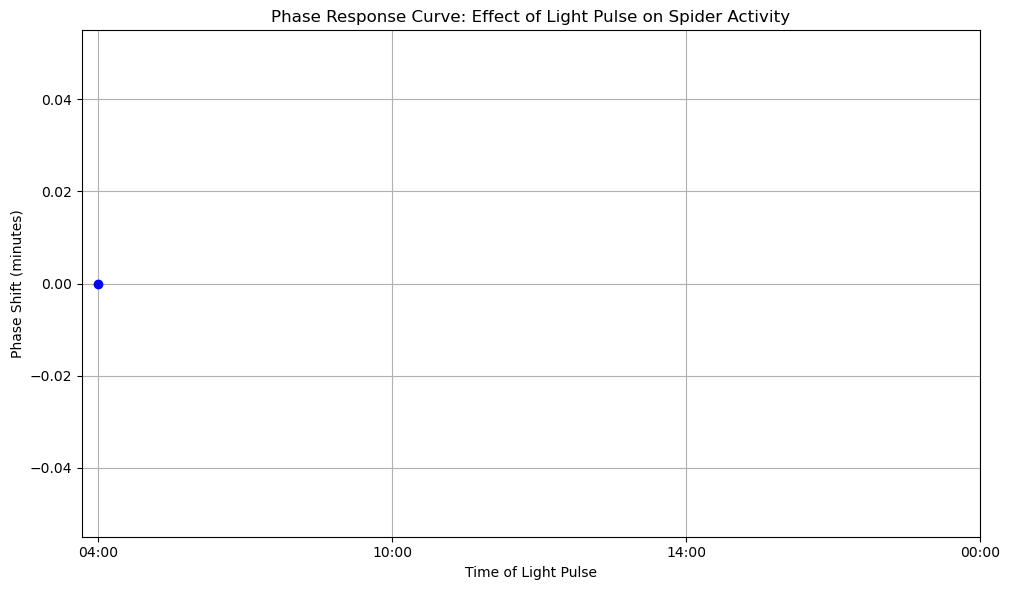

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    try:
        df = pd.read_csv(file, names=col_names, sep='\s+', header=None, na_values=['na', '--'])
        df = df.set_index('Index')
        
        print(f"Raw data from {file}:")
        print(df.head())
        print(f"Shape after reading: {df.shape}")
        
        # Convert Time to proper time format
        df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
        df = df[df["MonStatus"] == 1]
        print(f"Shape after MonStatus filter: {df.shape}")

        month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
        df['DateM'] = df['DateM'].str[:3].map(month_map)
        df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
        
        # Create Date column
        df['Date'] = pd.to_datetime(df['DateY'].astype(str) + '-' + 
                                    df['DateM'].astype(str).str.zfill(2) + '-' + 
                                    df['DateD'].astype(str).str.zfill(2), 
                                    format='%Y-%m-%d', errors='coerce')
        print(f"Shape after Date creation: {df.shape}")

        df = df.drop(["DateD", "DateM", "DateY", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

        day_map = {day: idx+1 for idx, day in enumerate(df['Date'].dt.date.unique())}
        df.insert(0, 'Day', df['Date'].dt.date.map(day_map))

        numeric_cols = [col for col in df.columns if col.startswith('Sp')]
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
        df['Activity'] = df[numeric_cols].sum(axis=1, skipna=True) / 60.0

        # Create Datetime column
        df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].dt.strftime('%H:%M:%S'))
        print(f"Shape before setting index: {df.shape}")
        
        df = df.set_index('Datetime')

        print(f"Final processed data from {file}:")
        print(df.head())
        print(f"Final shape: {df.shape}")

        return df

    except Exception as e:
        print(f"Error processing {file}: {str(e)}")
        return None

# Function to process all files into DataFrames
def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=2):
        df = process_file(file)
        if df is not None and not df.empty:
            dataframes[f'df{idx}'] = df
    return dataframes

# List of files to process
files = ['Steatoda A masking 02 pm.txt',
         'Steatoda A masking 10 am.txt',
         'Steatoda A masking midnight.txt',
         'Steatoda A masking 4 am.txt']

# Process all files into DataFrames
dataframes = process_files(files)

# Display all dataframes with 'Activity' column added
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)
    print()

# Step 1: Calculate average activity during days 6, 7, and 8 after light pulse for each file
try:
    # Dictionary to store average activities for each post-pulse file
    avg_activities = {}

    for name, df in dataframes.items():
        avg_activity = df[df['Day'].isin([6, 7, 8])]['Activity'].mean()
        avg_activities[name] = avg_activity

    print("Average Activities for Days 6, 7, 8 after Light Pulse:")
    for name, avg_activity in avg_activities.items():
        print(f"{name}: {avg_activity}")

except KeyError as e:
    print(f"Error: DataFrame '{e}' not found in dataframes. Please check the processing logic.")
    exit()

# Step 2: Calculate phase shifts for each post-light pulse activity file
post_pulse_files = ['Steatoda A masking 02 pm.txt',
                    'Steatoda A masking 10 am.txt',
                    'Steatoda A masking midnight.txt',
                    'Steatoda A masking 4 am.txt']

post_pulse_dataframes = {}

for file in post_pulse_files:
    try:
        post_pulse_dataframes[file] = dataframes[f'df{files.index(file) + 2}']  # Adjust index based on how dataframes are stored

    except KeyError as e:
        print(f"Error: DataFrame for '{file}' not found in dataframes. Please check the processing logic.")
        continue

# Function to calculate phase shift based on cross-correlation
def calculate_phase_shift(normal_activity_data, post_pulse_data):
    try:
        # Check if dataframes are empty
        if normal_activity_data.empty or post_pulse_data.empty:
            print("One or both dataframes are empty.")
            return np.nan

        # Clean data: Handle NaNs or zeros in 'Activity' column
        normal_activity_data = normal_activity_data.dropna(subset=['Activity'])
        post_pulse_data = post_pulse_data.dropna(subset=['Activity'])
        
        # Check if dataframes are still not empty after cleaning
        if normal_activity_data.empty or post_pulse_data.empty:
            print("One or both dataframes are empty after cleaning.")
            return np.nan

        # Ensure equal lengths by resampling or interpolating
        normal_activity_data = normal_activity_data.resample('5T').mean().interpolate(method='linear')
        post_pulse_data = post_pulse_data.resample('5T').mean().interpolate(method='linear')
        
        if len(normal_activity_data) != len(post_pulse_data):
            raise ValueError("Lengths of normal and post-pulse activity data must be equal.")
        
        # Use only specified sensors for phase shift calculation
        activity_cols = ['Sp4', 'Sp7', 'Sp11', 'Sp13', 'Sp15', 'Sp17', 'Sp18', 'Sp19', 'Sp21', 'Sp22', 'Sp25']
        normal_activity = normal_activity_data[activity_cols].to_numpy().flatten()
        post_pulse_activity = post_pulse_data[activity_cols].to_numpy().flatten()
        
        # Compute cross-correlation
        cross_corr = correlate(normal_activity, post_pulse_activity, mode='same')
        
        # Find index of the maximum correlation (peak of cross-correlation)
        max_corr_index = np.argmax(cross_corr)
        
        # Corresponding lag time (in minutes)
        lag_time = (max_corr_index - len(cross_corr) // 2) * 5  # 5 minutes between each sample
        
        return lag_time

    except Exception as e:
        print(f"Error in calculate_phase_shift: {str(e)}")
        return np.nan

# Calculate phase shifts for each post-pulse file
phase_shifts = {}

for file, df in post_pulse_dataframes.items():
    phase_shift = calculate_phase_shift(dataframes['df2'], df)  # Using 'df2' as the normal activity data
    phase_shifts[file] = phase_shift

# Step 4: Plot Phase Response Curve
# Create lists for x (times of light pulses) and y (phase shifts)
light_pulse_times = ['04:00', '10:00', '14:00', '00:00']  # Specify the desired order
shift_values = [phase_shifts.get(file, np.nan) for file in post_pulse_files]

# Plotting the Phase Response Curve
plt.figure(figsize=(10, 6))
plt.plot(light_pulse_times, shift_values, marker='o', linestyle='-', color='b')
plt.title('Phase Response Curve: Effect of Light Pulse on Spider Activity')
plt.xlabel('Time of Light Pulse')
plt.ylabel('Phase Shift (minutes)')
plt.grid(True)
plt.tight_layout()
plt.xticks(light_pulse_times)  # Set x-axis ticks to specified time points
plt.show()